# SVM para la deteccion de diabetes

Intentamos crear un SVM que permita identificar pacientes con diabetes conociendo unicamente sus caracteristicas fisicas, sin realizar un examn especifico, sobre el tema. Contamos con los datos de 768 pacientes los cuales estan identificados con 0 en caso de no tener diabetees y con 1 en caso contrario

La tarea sera realizada con un SVM de **clasificacion** que sera realizada con la classe **svc** de la libreria **sklearn**

In [1]:
# manipulacion de datos
import pandas as pd
# operaciones numericas
import numpy as np
# para medicion del tiempo que toma ejecutar los procesos
from sklearn.model_selection import train_test_split
# libreria para SVM
from sklearn.svm import SVC
# medicion de la precision
from sklearn.metrics import accuracy_score, confusion_matrix
# generar graficos
import matplotlib.pyplot as plt

In [ ]:
# leemos el set de datos y lo cargamos en la variable df
diabetes_df = pd.read_csv('diabetes.csv')
# mostrar informacion
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# ver los primeros 5 registros
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# contar valores unicos de la columna en un df en funcion a la columna
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Para empezar el proceso de entrenamiento, es necesario separar las caracteristicas (X) y las etiquetas (y) las SVM se encargara de aprender la relacion que existe entre 'X' y 'y'

In [ ]:
# creacion de un nuevo df llamado X con las columnas y caracteristicas
# Generando una lista de columnas del df a utilizar

characters_X = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age',
]
# actualizacion de lista original
X = diabetes_df[characters_X]
# mostrar df
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
# mismo procedimiento para generar y
characters_y = [
    'Outcome'
]
# actulizacion de base original
y = diabetes_df[characters_y]
# mostrar df
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


Procedemos a separar nuestros sets en conjuntos de entrenamiento y de prueba

Usando train_test_split, por defecto tomará 25% de nuestros conjunto de datos, como prueba y el resto para el entrenamiento

In [ ]:
# separar en datos de entrenamiento y datos de prueba
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y
)

In [ ]:
# cantidad de datos para el entrenamiento
X_train.shape

(576, 8)

In [ ]:
# cantidad de datos para las pruebas
X_test.shape

(192, 8)

Usamos SVC (support vector classifier), en este caso tomaremos un kernel lineal, para que el entrenamiento sea rapido

In [ ]:
# definicion del modelo
clasificacion = SVC(kernel='linear') # Lineas rectas
#clasificacion = SVC(kernel='poly') # Lineas curvas
#clasificacion = SVC(kernel='rbf') # Lineas circulos


In [ ]:
import time

# Registro del momento en que se inicia el entrenamiento
hora_inicio = time.time()

# Convierte y_train en un arreglo NumPy y luego aplana (ravel) el arreglo
y_train_np = np.array(y_train)

# Luego, realiza el ajuste (fit) utilizando y_train_flattened
clasificacion.fit(X_train.values, y_train_np.ravel())

# Tiempo tomado para el entrenamiento
tiempo_transcurrido = time.time() - hora_inicio
print('Entrenamiento terminado en {} segundos'.format(tiempo_transcurrido))



Entrenamiento terminado en 3.5196754932403564 segundos


## Medir su precision

In [ ]:
# guardar registro del tiempo
hora_inicio2 = time.time()

# prediccion con nustra X de prueba
y_pred = clasificacion.predict(X_test)

# mostramos el tiempo tomado para la prediccion
timpo_transcurrido = time.time() - hora_inicio2
print('Prediccion terminada en {} segundos'.format(timpo_transcurrido))

# mostrar predicciones
# for i in y_pred:
#   otro = 0
#   for otro in range(10):
#     otro = otro + 1
#     print(i)


Prediccion terminada en 0.005083799362182617 segundos


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
# evaluacion de la precision
accuracy_score(y_test, y_pred)

0.84375

# Matriz de confusion
nos ayuda a tener una mejor idea del rendimiento de nuestro modelo. Compara la cantidad de aciertos de cada clase de nuestros datos de prueba y nuestros datos calculados

In [ ]:
# La funcion de la matriz de confusion, recibe las respuestas correctas y nuestras predicciones
conf_diabetes = confusion_matrix(y_test, y_pred)
conf_diabetes

array([[114,   9],
       [ 21,  48]])

In [ ]:
# funcion que muestra matriz de confucion de forma grafica
def plot_cm(cm, classes):
  """ Esta funcion se encarga de generar un grafico con nuestra matriz de confusion.
  cm es la matriz generada por la confusion_matrix
  classes es una lista que contiene las posibles clases que puede predecir nuestro modelo
  """
  plt.imshow(cm, cmap=plt.cm.Blues)
  plt.title('Matriz de confusion')
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  thresh = cm.max() / 2.
  for indice_fila, fila in enumerate(cm):
    for indice_columna, columna in enumerate(fila):
      if cm[indice_fila, indice_columna] > thresh:
        color = 'white'
      else:
        color = 'black'
      plt.text(
          indice_columna,
          indice_fila,
          cm[indice_fila, indice_columna],
          color = color,
          horizontalalignment = 'center'
      )

  plt.ylabel('Valores reales')
  plt.ylabel('Valores calculados')
  plt.show()

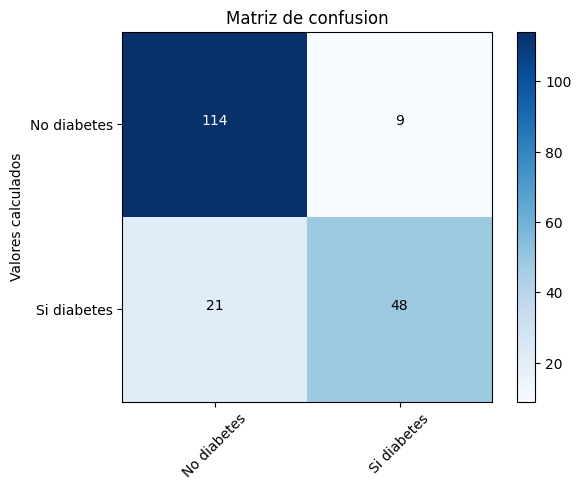

In [ ]:
# generamos el grafico, llamando a la funcion y enviando parametros
# cm = a la matriz de confusion
# classes = las clases a predecir, (si se tienen diabetes o no)
plot_cm(conf_diabetes, ['No diabetes', 'Si diabetes'])